# Sports Data Analytics- English Premier League 2020-21 season  
### About the DataSet
#### This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in  the EPL and their standard stats such as Goals, Assists, xG, xA, Passes Attempted, Pass Accuracy and more! 

In [23]:
#import the libraries
import pandas as pd #dATA MAnipulation library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#Load dataset
epl_df = pd.read_csv('./Data/EPL_20_21.csv')
epl_df.head()#gives first 5 entries

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [25]:
epl_df.info()#gives all the information regarding the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [26]:
epl_df.describe()#gives all the variables information

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [27]:
epl_df.isna().sum()#describes the number of empty values in column. 

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [28]:
#create 2 new columns
epl_df['MinsPerMatch'] = (epl_df['Mins']/epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch'] = (epl_df['Goals']/epl_df['Matches']).astype(float)
epl_df.head()




,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [29]:
#total goals
Total_Goals = epl_df['Goals'].sum()
Total_Goals

986

In [30]:
 #Determines Total Penalty Goals
Total_Penalty_Goals = epl_df['Penalty_Goals'].sum() 
Total_Penalty_Goals


102

In [31]:
#Penalties Attempted
Pen_Attempts = epl_df['Penalty_Attempted'].sum()
Pen_Attempts

125

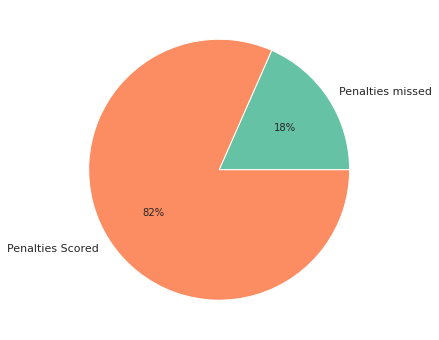

In [33]:
#Pie Chart for penalties missed v scored
Pen_Missed = Pen_Attempts-Total_Penalty_Goals
Pen_Missed
plt.figure(figsize=(12,6)) #changes the dimensions of the chart
data = [Pen_Missed,Total_Penalty_Goals]
labels = ['Penalties missed', 'Penalties Scored']
color = sns.color_palette('Set2')
plt.pie(data,labels = labels, colors = color, autopct = '%.0f%%')
#creates pie chart with colors and autopct creates percentages and based on what you put after the decimal, it will give that many decimal values and display as string 
plt.show()



In [ ]:
#Unique Positions
unique_pos = epl_df['Position'].unique()
unique_pos


In [ ]:
#total fw players
total_fw_players = epl_df[epl_df['Position'] == 'FW']#When finding within an array, you have to define it as a list twice
total_fw_players

In [ ]:
#Different nations represented
unique_nat = epl_df['Nationality'].unique()
np.size(unique_nat)


In [ ]:
#Most players from which countries
Nationality_player= epl_df.groupby('Nationality').size().sort_values(ascending = False)
#groupby command groups players by the nationality 
#size() gives count and ascending = False will sort values in descending order. 
Nationality_player.head(10).plot(kind = 'bar', figsize=(12,6),color = sns.color_palette("magma")) #Displays top 10 max 

In [ ]:

#Clubs with max players in squad
Club_max_players =epl_df.groupby('Club').size().sort_values(ascending=False)
Club_max_players.head(5).plot(kind = 'bar', figsize=(10,5),color= sns.color_palette("viridis")) 


'''
Another way

epl_df['Club'].value_counts().nlargest(5).plot(kind = 'bar',color= sns.color_palette("viridis"))
'''

In [ ]:
#Clubs with least players in the squad
Club_least = epl_df['Club'].value_counts().nsmallest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

In [ ]:
#Players based on age group
Player_age = epl_df.groupby("Age").size().sort_values(ascending=False)
Player_age
Under_20 = epl_df[epl_df["Age"]<20]
Under_20
Age20_25 = epl_df[(epl_df["Age"]>=20)& (epl_df["Age"]<25)]
Age20_25
Age25_30 = epl_df[(epl_df["Age"]>=25)& (epl_df["Age"]<30)]
Age25_30
Age30 = epl_df[(epl_df["Age"]>30)]
Age30
count20 = Under_20["Name"].count()
count20_25 = Age20_25["Name"].count()
count25_30 = Age25_30["Name"].count()
count30 = Age30["Name"].count()

data = np.array([count20,count20_25,count25_30,count30])
my_labels = ["<20",">=20 & <25",">=25 & <30",">=30"]
color = sns.color_palette('cubehelix')
plt.title('Total players with age groups', fontsize = 20)
plt.pie(data,labels = my_labels, colors = color, autopct = '%.2f%%')
#creates pie chart with colors and autopct creates percentages and based on what you put after the decimal, it will give that many decimal values and display as string 
plt.show()


In [ ]:
#Players under 20 in each club
PerClubUnder20 = epl_df[epl_df['Age']<20]
PerClubUnder20['Club'].value_counts().plot(kind = 'bar', color = sns.color_palette("cubehelix"))



In [ ]:
#Under 20 players in Manchester United
Under_20[Under_20["Club"]=="Manchester United"]

In [ ]:
#Under 20 players from Chelsea
Under_20[Under_20["Club"]=="Chelsea"]

In [ ]:
#Average age of players in each club 
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Club',y = 'Age', data = epl_df)
plt.xticks(rotation = 90)

In [ ]:
num_player = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum())/num_player
data.sort_values(ascending = False)


In [ ]:
#Total assists from each club
Assists_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style="whitegrid",color_codes=True)
ax = sns.barplot(x='Club',y='Assists',data=Assists_by_clubs.sort_values(by="Assists"),palette='Set2')#Sorts from smallest to largest.
ax.set_xlabel("Club",fontsize=30)
ax.set_ylabel("Assists",fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title("Plot of CLubs v Total Assists", fontsize = 20)




In [ ]:
top_10_assists = epl_df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n=10, columns = 'Assists') #gives top10
top_10_assists

Text(0.5, 1.0, 'Plot of CLubs v Total Goals')

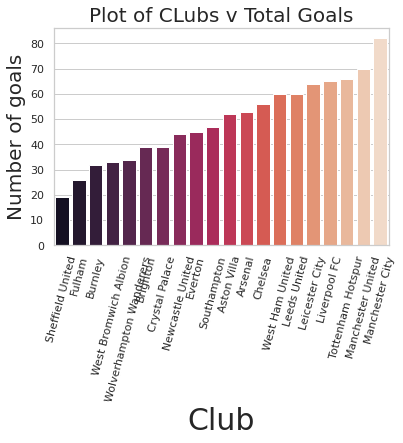

In [36]:
Goals_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
sns.set_theme(style="whitegrid",color_codes=True)
ax = sns.barplot(x="Club",y='Goals',data=Goals_by_clubs.sort_values(by="Goals"),palette='rocket')
ax.set_xlabel("Club",fontsize=30)
ax.set_ylabel("Number of goals",fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)     #creates bar graph of most goals by club from least to greatest
plt.title("Plot of CLubs v Total Goals", fontsize = 20)

In [38]:
#Most goals by players
top_10_goals = epl_df[["Name", "Club", "Goals", "Matches"]].nlargest(n=10, columns='Goals')
top_10_goals


,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [43]:
#Goals per Match
Goal_per_match = epl_df[["Name", "Goals", "GoalsPerMatch", "Matches"]].nlargest(n=10, columns="GoalsPerMatch")
Goal_per_match

,Name,Goals,GoalsPerMatch,Matches
162,Harry Kane,23,0.657143,35
81,Mohamed Salah,22,0.594595,37
307,Joe Willock,8,0.571429,14
145,Jesse Lingard,9,0.562500,16
175,Gareth Bale,11,0.550000,20
74,Anthony Elanga,1,0.500000,2
51,Bruno Fernandes,18,0.486486,37
237,Dominic Calvert-Lewin,16,0.484848,33
120,Kelechi Iheanacho,12,0.480000,25
92,Diogo Jota,9,0.473684,19


([<matplotlib.patches.Wedge at 0x7f4a9cc90460>,
 [Text(0.6317313350719539, 0.9005084787430971, 'Goals without assists'),
  Text(-0.6317313350719536, -0.9005084787430973, 'Goals with assists')],
 [Text(0.3445807282210657, 0.4911864429507802, '31%'),
  Text(-0.3445807282210655, -0.4911864429507803, '69%')])

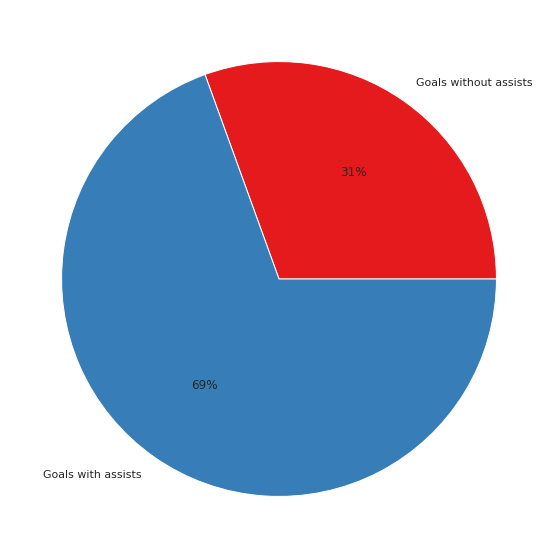

In [50]:
#PieChart for goals with assist and without assits
plt.figure(figsize=(20,10))
assist = epl_df['Assists'].sum()
data = [Total_Goals-assist,assist]
labels = ['Goals without assists', 'Goals with assists']
color = sns.color_palette('Set1')
plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')

In [52]:
#top players with most yellow cards
Yellow_Cards = epl_df[["Name", "Yellow_Cards", "Matches"]].nlargest(n=10, columns="Yellow_Cards")
Yellow_Cards


,Name,Yellow_Cards,Matches
266,John McGinn,12,37
53,Harry Maguire,11,34
480,Conor Gallagher,11,30
218,Kalvin Phillips,10,29
270,Douglas Luiz,10,33
159,Pierre Højbjerg,9,38
242,Mason Holgate,9,28
55,Luke Shaw,8,32
189,Héctor Bellerín,8,25
272,Matty Cash,8,28
